# Importing relevant libraries

In [37]:
import numpy as np

import pandas as pd

import warnings

warnings.filterwarnings('ignore')

import seaborn as sns

import calendar

import datetime

from sklearn import linear_model, tree

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Data exploration

In [38]:
train_data = pd.read_csv('Train_Data.csv')

train_data.info()

print(train_data.sample(10))

print("Data nulls :\n",train_data.isnull().sum())

#The given data has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
Date         111 non-null object
Quantity     111 non-null float64
Price/ltr    111 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.7+ KB
           Date  Quantity  Price/ltr
86   26-07-2018   3087.36      68.41
54   24-06-2018   2671.93      68.11
26   27-05-2018   1562.10      69.64
93   02-08-2018   1923.08      68.58
19   20-05-2018   1695.06      68.14
92   01-08-2018   2712.52      68.44
67   07-07-2018   3008.95      68.33
107  16-08-2018   2695.03      69.44
33   03-06-2018   1574.83      69.69
36   06-06-2018   2673.45      69.38
Data nulls :
 Date         0
Quantity     0
Price/ltr    0
dtype: int64


# Feature Engineering

In the given data, there are two input variables and a target variable(Quantity). To identify the factors responsible which influence the fuel quantity, we need to extract new features from the given data. Following code leads us to deduce such variables.

In [39]:
train_data['day'] = train_data['Date'].apply(lambda x: calendar.day_name[datetime.datetime.strptime(x,"%d-%m-%Y").weekday()])

train_data['month'] = train_data['Date'].str.split("-",expand = True)[1]

Date_data = train_data['Date']

train_data.drop(['Date'],axis=1, inplace=True)

train_data['day'] = train_data['day'].apply(lambda x: x[:3])

train_data['weekend'] = train_data['day'].apply(lambda x: 1 if x == 'Sat' or x == 'Sun' else 0)

mylist = list(train_data.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(train_data[mylist], prefix = mylist)

train_data.drop(mylist, axis=1, inplace=True)

train = pd.concat([train_data,dummies], axis=1)

print(train.head(10))

train.info()

   Quantity  Price/ltr  weekend  day_Fri  day_Mon  day_Sat  day_Sun  day_Thu  \
0   2199.65      66.45        0        0        0        0        0        0   
1   2637.67      66.45        0        0        0        0        0        0   
2   3374.13      66.45        0        0        0        0        0        1   
3   3180.69      66.45        0        1        0        0        0        0   
4   3303.22      66.45        1        0        0        1        0        0   
5   1582.24      66.45        1        0        0        0        1        0   
6   4422.40      66.45        0        0        1        0        0        0   
7   1944.37      66.45        0        0        0        0        0        0   
8   3245.93      66.45        0        0        0        0        0        0   
9   1885.18      66.45        0        0        0        0        0        1   

   day_Tue  day_Wed  month_05  month_06  month_07  month_08  
0        1        0         1         0         0        

# Heat map to observe the correlations between the variables

A heatmap is drawn using seaborn library to observe how much the variables are related to each other. From the graph provided below, we can see that variables like 'day_Sun', 'weekend', and 'day_Sat' have highest correlation(negative or positive) with the target variable, Quantity, followed by weak correlations of 'Price/lir', 'day_Thu', 'day_Fri' etc. With this information, we can say that the type of the day, whether it is a weekend or not, has the highest influence on the quantity of fuel.

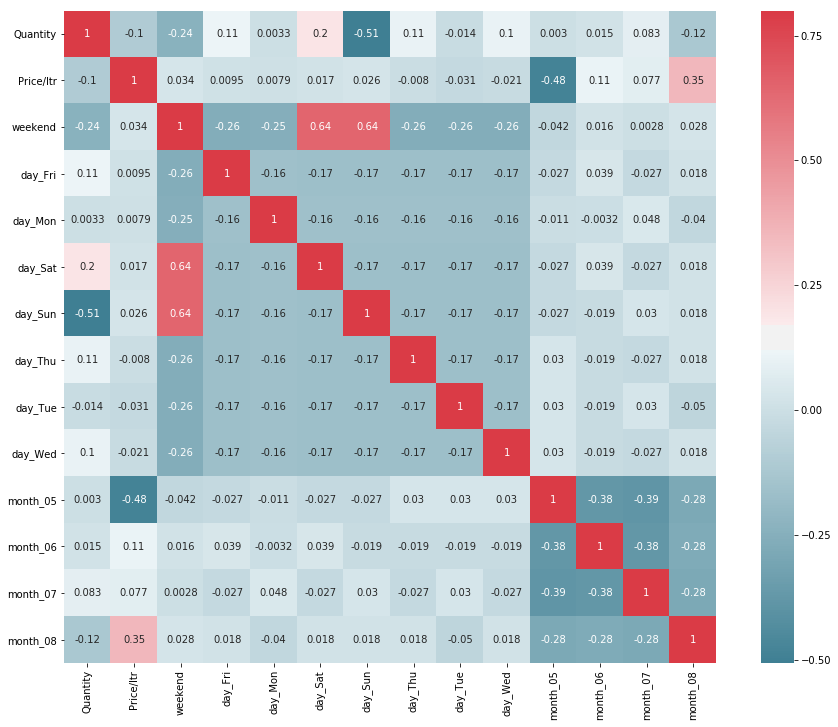

In [40]:
matrix = train.corr()

colormap = sns.diverging_palette(220,10,as_cmap=True)

fig, ax = plt.subplots(figsize = [16,12])

sns.heatmap(matrix,cmap=colormap, vmax = 0.8,square = True,annot = True)

# Using Linear Regression to obtain parameters for the given variables

If we build a basic linear regression model between input and target variables, it would also give significant information about the variables. The dataframe, coefficients contains the information regarding the features and their corresponding coefficient values in the linear regression model. Even from this information, we can say that a day being a weekend or not has the highest influence on the quantity of fuel followed by other weak variables like 'day_Thu', 'day_Fri' etc.

In [41]:
linear = linear_model.LinearRegression()

target = train['Quantity']

train.drop(['Quantity'],axis=1, inplace=True)

reg = linear.fit(train, target)

coefficients = pd.DataFrame({"Feature":train.columns,"Coefficients":np.transpose(reg.coef_)})

print(coefficients.head(13))


    Coefficients    Feature
0     -61.530024  Price/ltr
1    -198.658648    weekend
2     126.547445    day_Fri
3     -62.149094    day_Mon
4     456.693493    day_Sat
5    -655.352141    day_Sun
6     115.225803    day_Thu
7     -91.869451    day_Tue
8     110.903946    day_Wed
9     -39.790626   month_05
10     22.387619   month_06
11    133.367970   month_07
12   -115.964964   month_08


# Data visualization of Decision Tree Regression model

The visualization given below is made in R with the help of libraries like 'rpart', 'rattle' etc. Average quantity of fuel is mentioned at every node in the given decision tree. From the figure below, it can be inferred that the average quantity of fuel is least when the day is Sunday and it is highest when the day is not among Monday, Tuesday, and Sunday and when Price/ltr is between 68.935 and 69.155 rupees. The minimum samples in the leaf node is maintained as 10 in the given decision tree. 

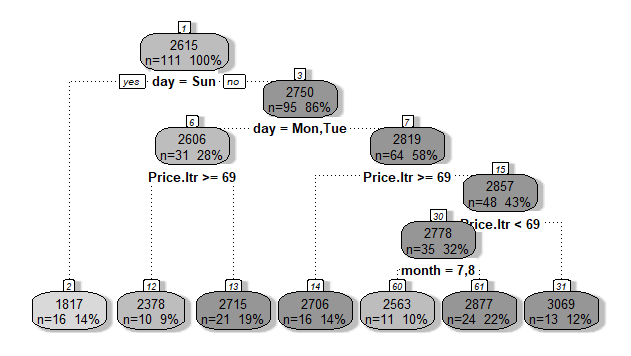

# Relevant Graphs

For plotting relevant graphs, I have converted the Quantity variable into 3 categories namely Low, Med, and High and I have converted the Price/ltr variable into 2 categories namely High and Low. The following graphs again depicts that a day being a weekend or not has high influence on quantity of fuel and the price of the fuel doesn't have much effect on the fuel quantity.

Text(0.5,1,'Low Price vs Quantity')

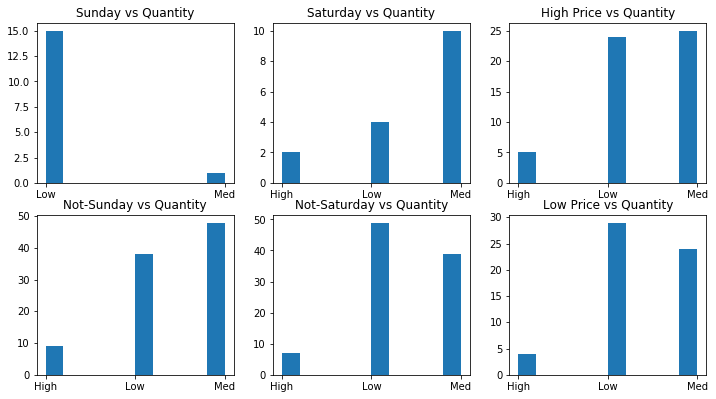

In [42]:
train = pd.concat([train,target], axis=1)

train['Quantity_Bin'] = pd.cut(train['Quantity'],3)

train['Price_Bin'] = pd.qcut(train['Price/ltr'],2)

label = LabelEncoder()

train['Quantity_Bin'] = label.fit_transform(train['Quantity_Bin'])

train['Price_Bin'] = label.fit_transform(train['Price_Bin'])

train['Quantity_Bin'] = train['Quantity_Bin'].apply(lambda x: 'Low' if x == 0 else ('Med' if x == 1 else 'High'))

plt.figure(figsize = [12,10])

plt.subplot(331)

plt.hist(train[train['day_Sun']== 1]['Quantity_Bin'])
plt.title('Sunday vs Quantity')

plt.subplot(334)

plt.hist(train[train['day_Sun']== 0]['Quantity_Bin'])
plt.title('Not-Sunday vs Quantity')

plt.subplot(332)

plt.hist(train[train['day_Sat']== 1]['Quantity_Bin'])
plt.title('Saturday vs Quantity')

plt.subplot(335)

plt.hist(train[train['day_Sat']== 0]['Quantity_Bin'])
plt.title('Not-Saturday vs Quantity')

plt.subplot(333)

plt.hist(train[train['Price_Bin']== 1]['Quantity_Bin'])
plt.title('High Price vs Quantity')

plt.subplot(336)

plt.hist(train[train['Price_Bin']== 0]['Quantity_Bin'])
plt.title('Low Price vs Quantity')

# Conclusion

From the Exploratory Data Analysis(EDA) performed on the given dataset, it can be concluded that the variables like 'day_Sun', 'weekend', 'Price/ltr' etc. have negative effect on the quanity of fuel whereas variables like 'day_Thu', 'day_Wed', 'day_Fri' etc. have a positive efect. 